In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import skimage.io as io
from pylab import *
import skimage
from skimage import filters
from skimage import img_as_float
from skimage.color import rgb2gray
import numpy as np
from skimage import io, morphology
from skimage.morphology import square
import numpy as np

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
#data load

plane = ['Dane/samolot08.jpg', 'Dane/samolot09.jpg', 'Dane/samolot07.jpg', 
         'Dane/samolot11.jpg','Dane/samolot17.jpg','Dane/samolot01.jpg']

max_hight = 0
max_width = 0

imgs = []

#planes
for i in range(len(plane)):
    imgs.append(img_as_float(io.imread(plane[i], as_gray=True)))
    s1,s2 = imgs[i].shape
    max_hight = max(s1,max_hight)
    max_width = max(s2,max_width)


In [4]:
def size_normalization(img):
    
    tab = np.array([0]*len(img[1]))
    for i in range(len(img),max_hight):
        img = np.concatenate((img,[tab]))
    
    tab2 = np.array([[0]*len(img)])
    tab2 = tab2.T
    
    for i in range(len(img[1]),max_width):
        img = np.concatenate((img,tab2),axis=1)
    
    return img
    

In [5]:
#show images
def show_gray(img):
    imshow(img, cmap='gray')
    
#larger contrast on picture
def gray(img):
    tmp = rgb2gray(img)
    return tmp

In [6]:
#normalization function

def normalizations(img):
    
    img = img*100/256
    
    min_value = 100000
    max_value = -100000
    
    for i in range(len(img)):
        for j in range(len(img[i])):
            if(img[i][j] > max_value):
                max_value = img[i][j]
            if(img[i][j] < min_value):
                min_value = img[i][j]
                
    #print("min: ", min_value)
    #print("max: ", max_value)
    
    MIN = min_value
    MAX = max_value
    
    #print("min: ", min_value)
    #print("max: ", max_value)
    
    norm = (img - MIN) / (MAX - MIN)
    norm[norm > 1] = 1
    norm[norm < 0] = 0
    
    return norm

In [7]:
def edges(img):
    
    img = morphology.dilation(img, square(3))
    
    return img

In [8]:
def picture_transform(img):
    
    img = gray(img)
    
    img = (img**0.15)
    
    img = normalizations(img)
    
    img = filters.rank.median(img, ones([2,2],dtype=uint8)) #filtr medianowy
    
    img = filters.sobel(img)**0.3 
    
    img = skimage.feature.canny(img, sigma=4.5)
    
    img = edges(img)
    
    img = size_normalization(img)
    
    return img


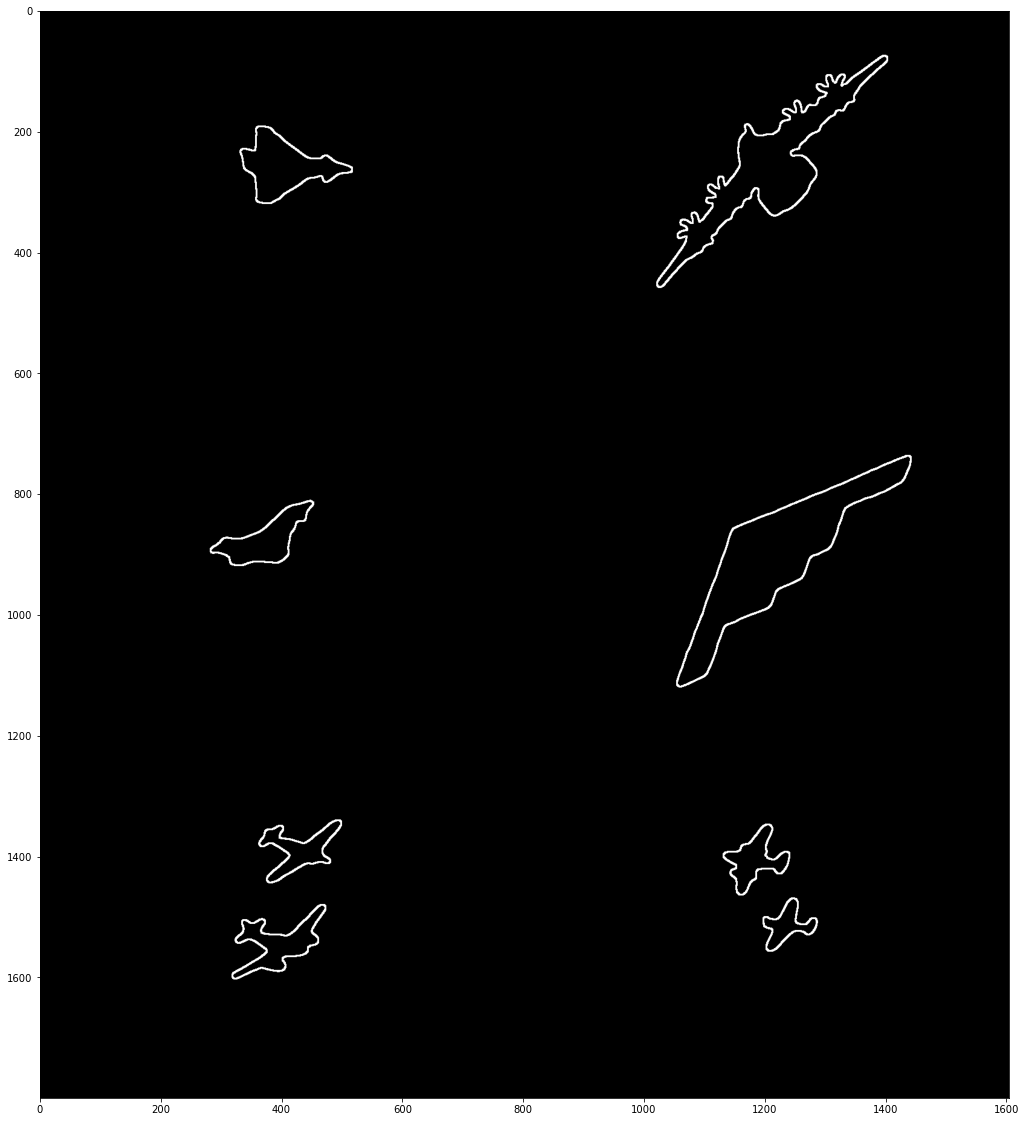

In [9]:
figure(figsize=(20,20))

#planes
for i in range(len(plane)):
    imgs[i] = picture_transform(imgs[i])

row1 = np.concatenate((imgs[0], imgs[1],imgs[2]))
row2 = np.concatenate((imgs[3],imgs[4], imgs[5]))

final_picture = np.concatenate((row1, row2), axis=1)

show_gray(final_picture)